EDA

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/Ford Car Price Prediction (2).csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17957 non-null  float64
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [29]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17957.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.312747,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.023480,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [30]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


In [31]:
df.dropna(inplace=True)

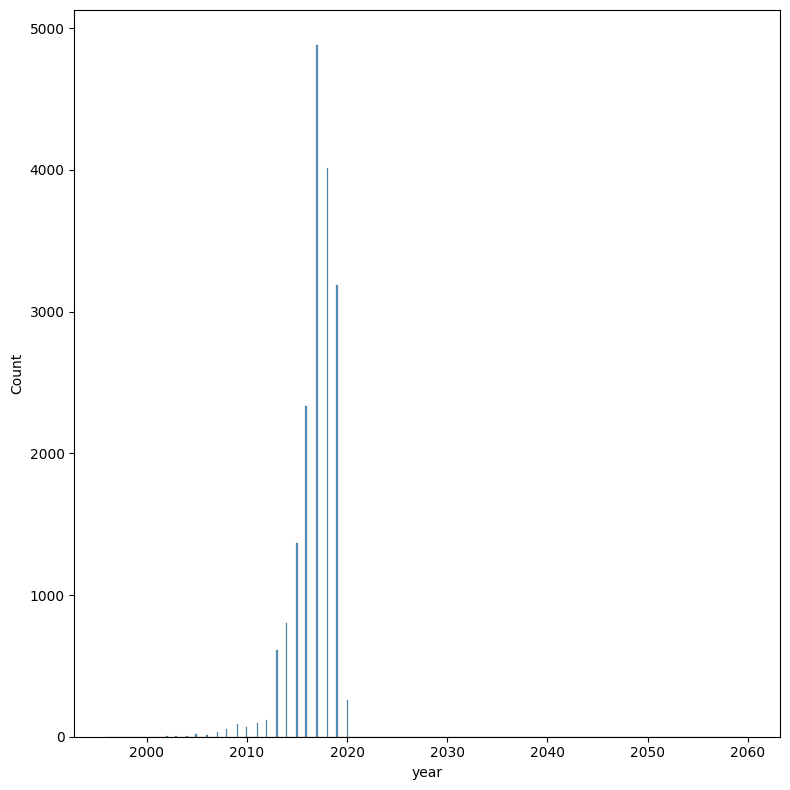

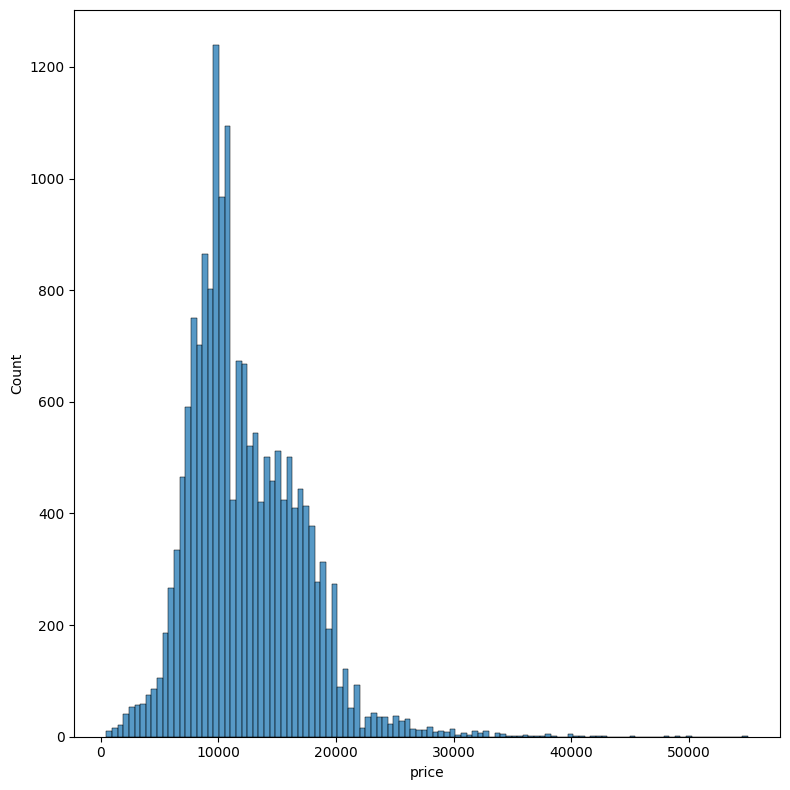

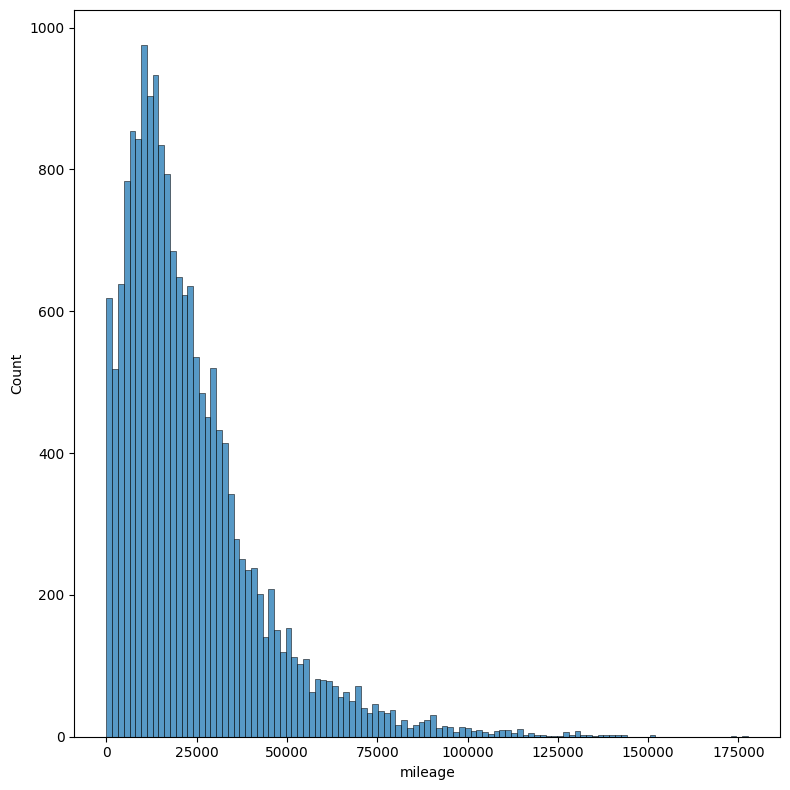

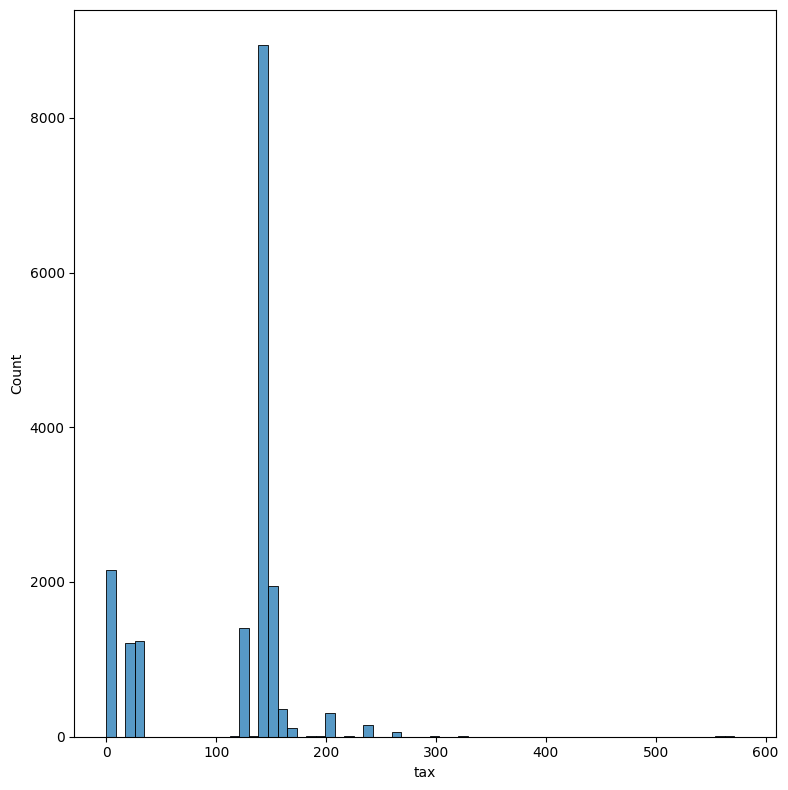

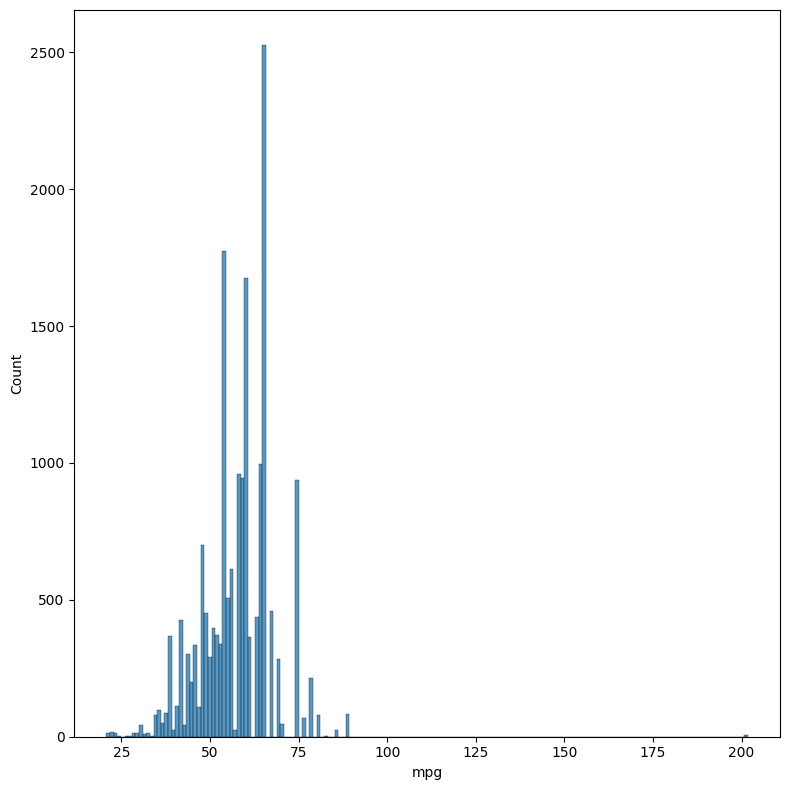

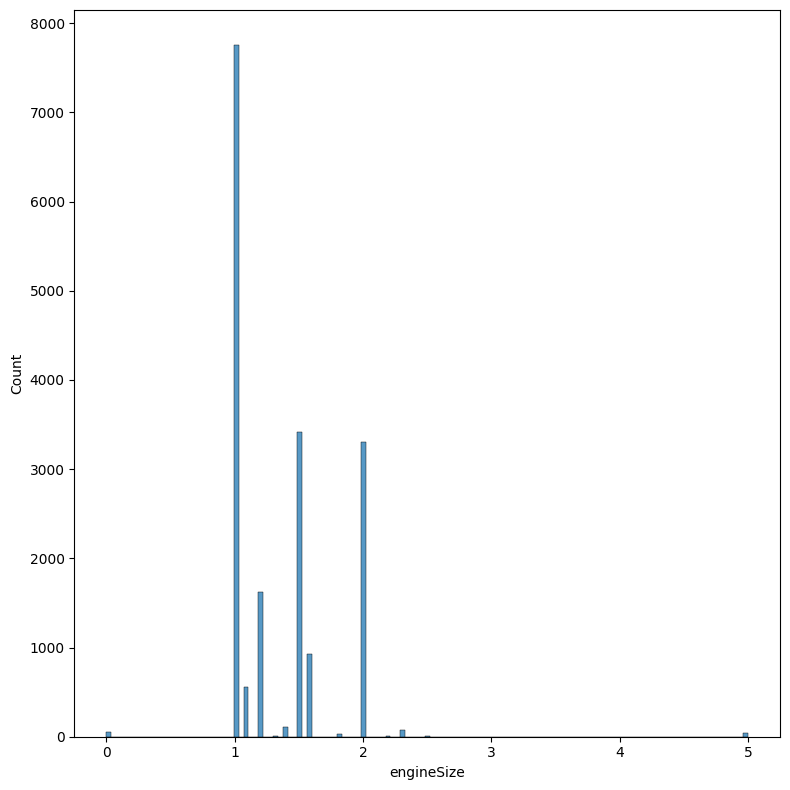

In [32]:
numerical_data = df.select_dtypes(include=['int64', 'float64']).columns
categorical_data = df.select_dtypes(include=['object','category']).columns

column_list = []
max_value_list = []
count_list = []
for col in numerical_data:
  most_common = df[col].mode().iloc[0]
  count = df[col].value_counts().iloc[0]
  #print(most_common)
  #print(count)
  column_list.append(col)
  max_value_list.append(most_common)
  count_list.append(count)

  plt.figure(figsize=(8,8))

  sns.histplot(x = df[col])
  plt.tight_layout()
  plt.show()

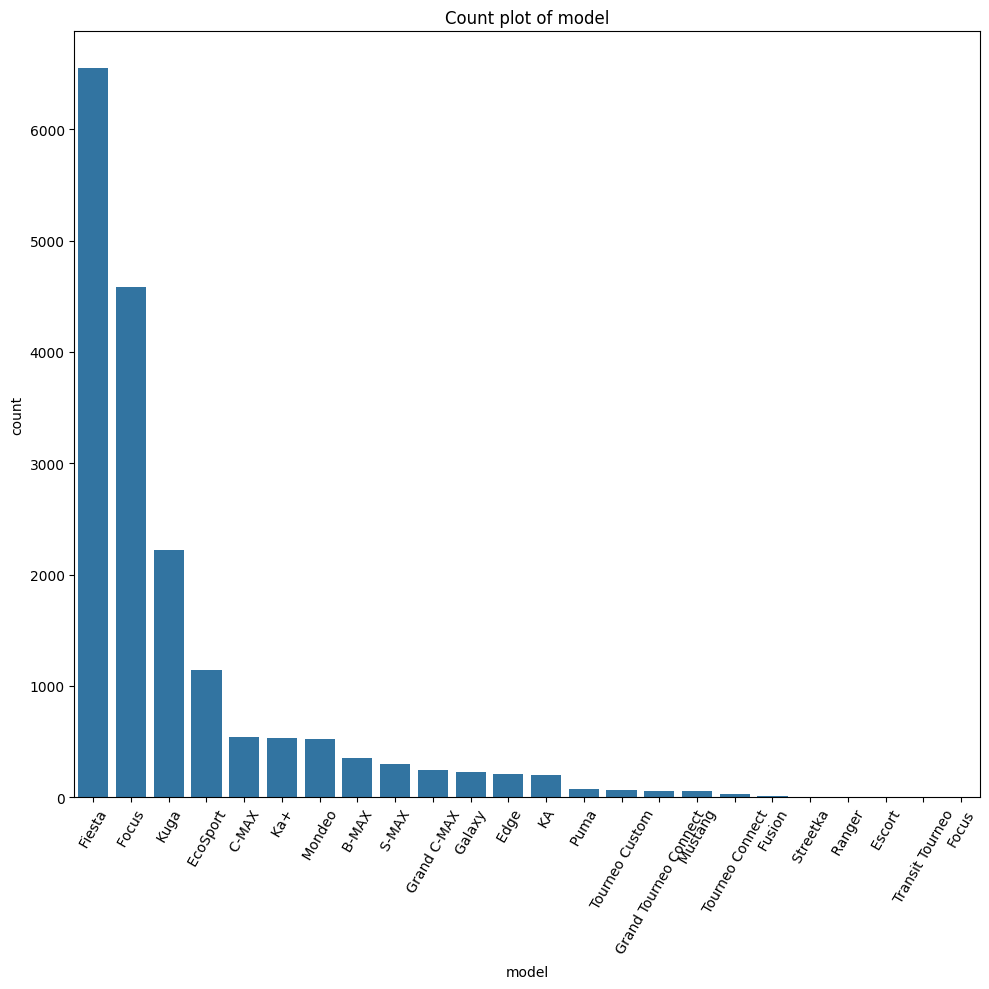

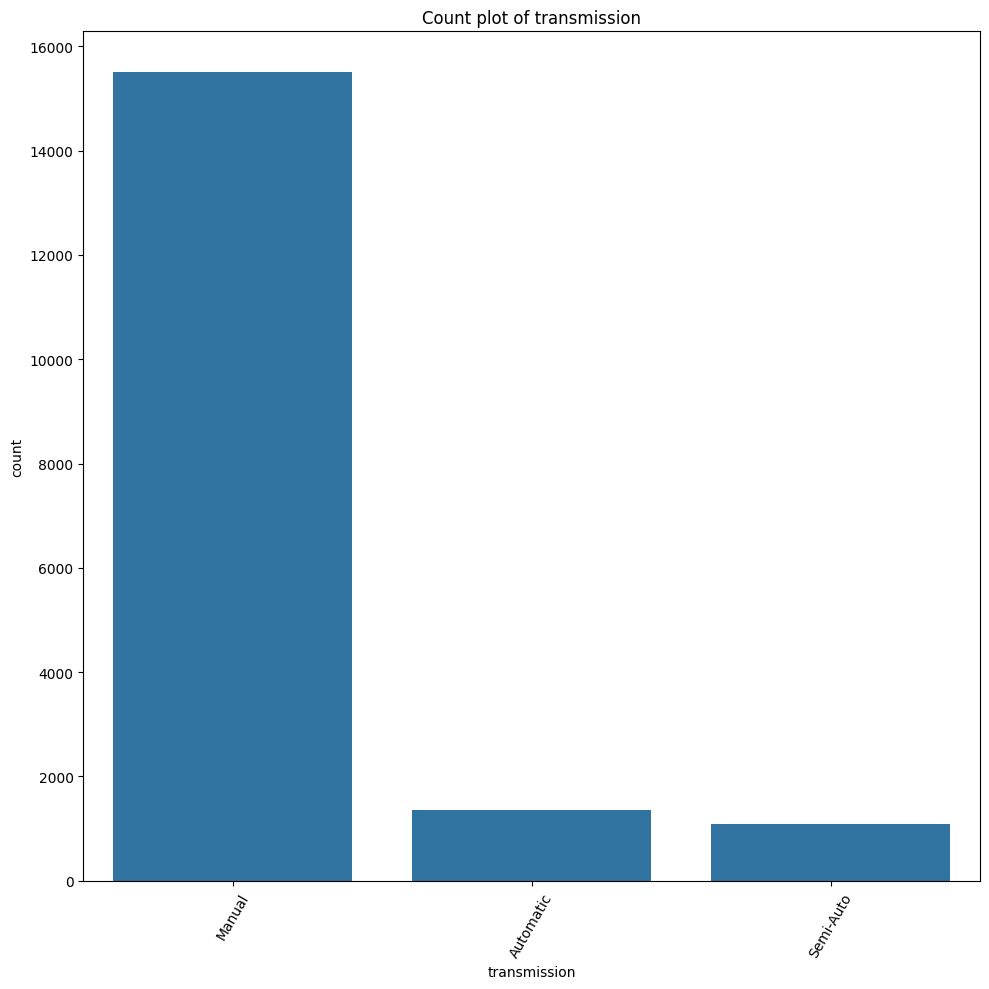

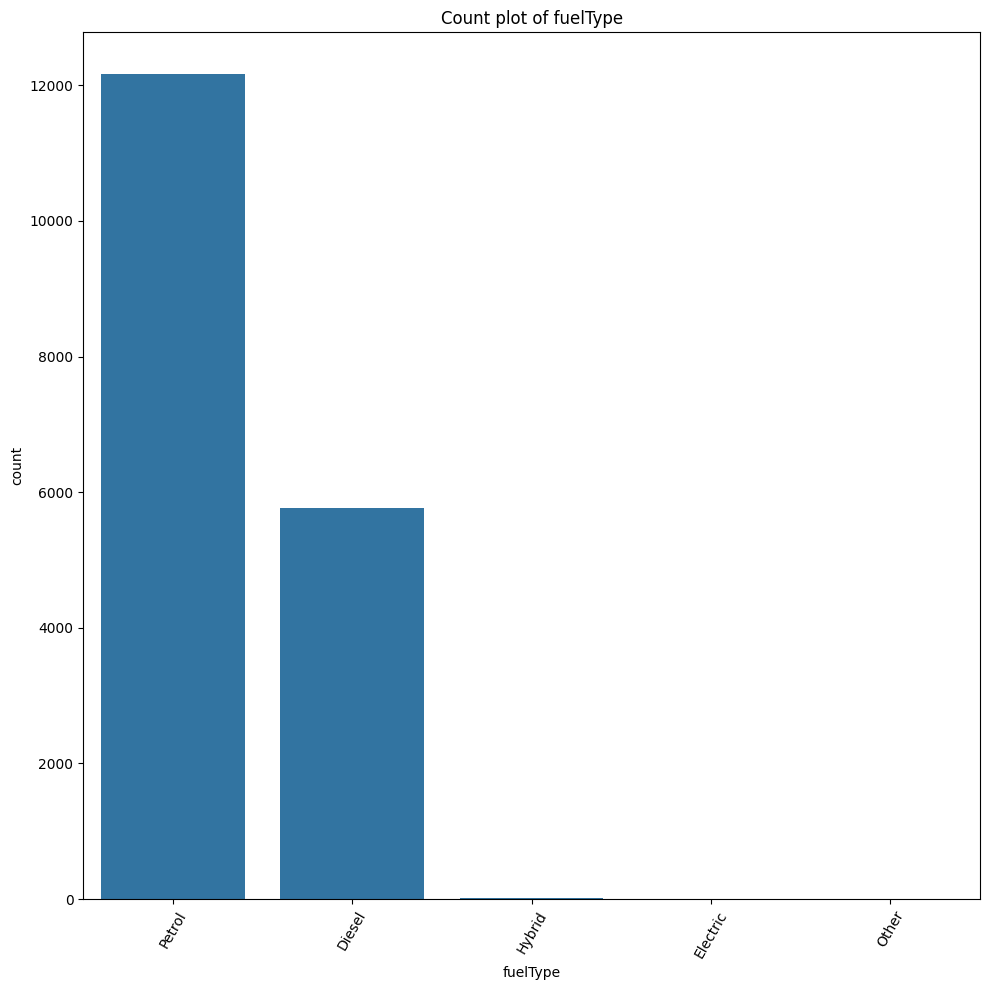

In [33]:

for col in categorical_data:

    most_common = df[col].mode().iloc[0]
    count = df[col].value_counts().iloc[0]
    column_list.append(col)
    max_value_list.append(most_common)
    count_list.append(count)

    plt.figure(figsize=(10,10))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=60)

    plt.tight_layout()

    plt.show()

In [34]:
print("Most common data entry per column and their count.")
print()
for i in range(len(column_list)):
  print(f'{i+1}.{column_list[i]}: {max_value_list[i]}. Number of entries: {count_list[i]} ')

Most common data entry per column and their count.

1.year: 2017. Number of entries: 4885 
2.price: 10000. Number of entries: 164 
3.mileage: 10. Number of entries: 40 
4.tax: 145.0. Number of entries: 8938 
5.mpg: 65.7. Number of entries: 2528 
6.engineSize: 1.0. Number of entries: 7760 
7.model:  Fiesta. Number of entries: 6552 
8.transmission: Manual. Number of entries: 15512 
9.fuelType: Petrol. Number of entries: 12171 


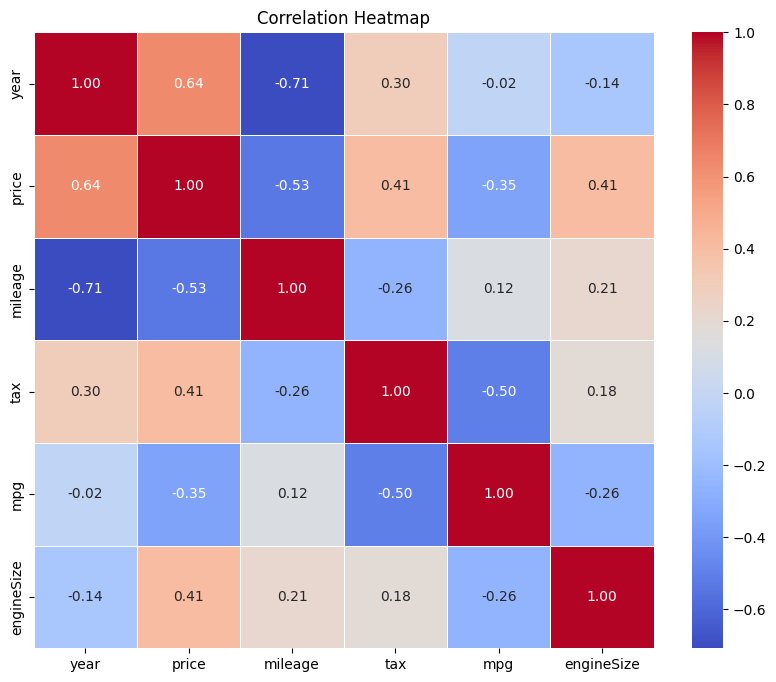

In [35]:
#RECHECK AFTER ENCODING
plt.figure(figsize=(10, 8))
corr = df[numerical_data].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

MODEL TRAINING


1. PRE PROCESSING

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# === 1. LOAD DATA ===
df = pd.read_csv("/content/Ford Car Price Prediction (2).csv")

# Identify price column
price_col = [col for col in df.columns if 'price' in col.lower()]
if not price_col:
    raise ValueError("Could not find a column that looks like 'Price'")
price_col = price_col[0]

# Drop missing values
df.dropna(inplace=True)

# Bin price into categories
df['Price_Class'] = pd.cut(df[price_col],
                           bins=[0, 10000, 20000, np.inf],
                           labels=['Low', 'Medium', 'High'])

# Drop original price column
df.drop(columns=[price_col], inplace=True)

# Encode categorical columns
le_dict = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

Decision Tree Accuracy: 0.8747216035634744
Random Forest Accuracy: 0.8917037861915368
PCA + Random Forest Accuracy: 0.888641425389755
Logistic Regression Accuracy: 0.8120824053452116

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.66      0.42      0.52       165
           1       0.82      0.76      0.79      1342
           2       0.82      0.87      0.84      2085

    accuracy                           0.81      3592
   macro avg       0.76      0.69      0.72      3592
weighted avg       0.81      0.81      0.81      3592



2. DATA SPLITTING AND SCALING

In [ ]:
# === 2. FEATURE/TARGET SPLIT ===
X = df.drop(columns=['Price_Class'])
y = df['Price_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. SCALING ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. TRAINING MODELS

In [ ]:
# === 4. MODELS ===

# 4.1 Decision Tree (Unscaled)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

# 4.2 Random Forest (Unscaled)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# 4.3 PCA + Random Forest (Scaled)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca_rf_model = RandomForestClassifier(random_state=42)
pca_rf_model.fit(X_train_pca, y_train)
pca_rf_preds = pca_rf_model.predict(X_test_pca)
print("PCA + Random Forest Accuracy:", accuracy_score(y_test, pca_rf_preds))

# 4.4 Logistic Regression (Scaled)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

# === 5. REPORT ===
print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, log_preds))


RESULT COMPARISON

1. ACCURACY AND F1_SCORE

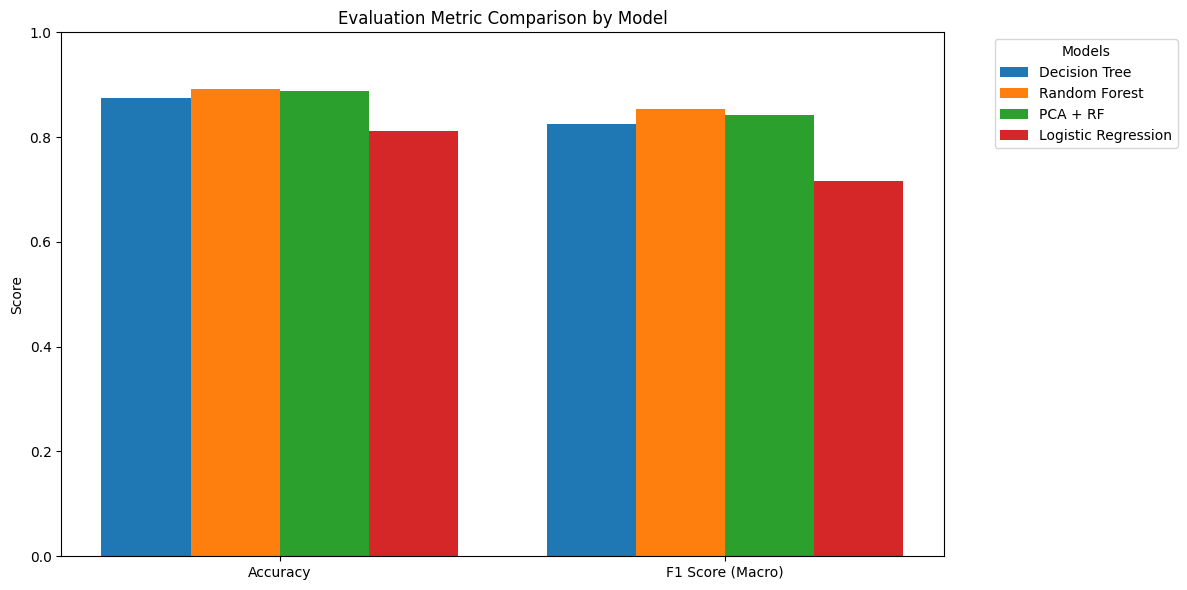

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure predictions are available
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
pca_rf_pred = pca_rf_model.predict(X_test_pca)
log_pred = log_model.predict(X_test_scaled)

# Evaluation results
metrics = ['Accuracy', 'F1 Score (Macro)']
model_names = ['Decision Tree', 'Random Forest', 'PCA + RF', 'Logistic Regression']
scores = [
    [accuracy_score(y_test, dt_pred),
     accuracy_score(y_test, rf_pred),
     accuracy_score(y_test, pca_rf_pred),
     accuracy_score(y_test, log_pred)],

    [f1_score(y_test, dt_pred, average='macro'),
     f1_score(y_test, rf_pred, average='macro'),
     f1_score(y_test, pca_rf_pred, average='macro'),
     f1_score(y_test, log_pred, average='macro')]
]

# Convert to numpy array for easier indexing
scores = np.array(scores)

# Bar plot configuration
x = np.arange(len(metrics))  # Accuracy, F1 Score
bar_width = 0.2

# Plot setup
plt.figure(figsize=(12, 6))  # Increase width to expand the plot area

# Plot the bars
for i in range(len(model_names)):
    plt.bar(x + i * bar_width, scores[:, i], width=bar_width, label=model_names[i])

# Formatting
plt.xticks(ticks=x + bar_width * 1.5, labels=metrics)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Evaluation Metric Comparison by Model')

# Move the legend outside the plot
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


2. CONFUSION MATRIX

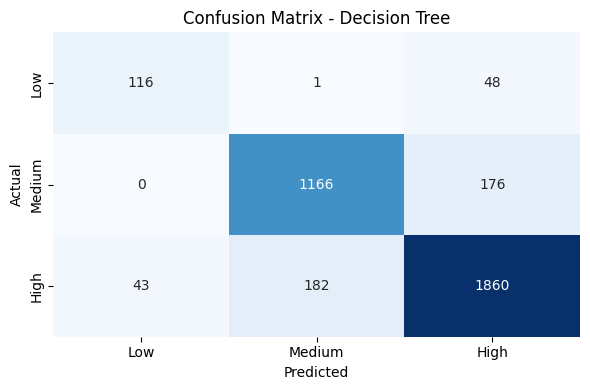

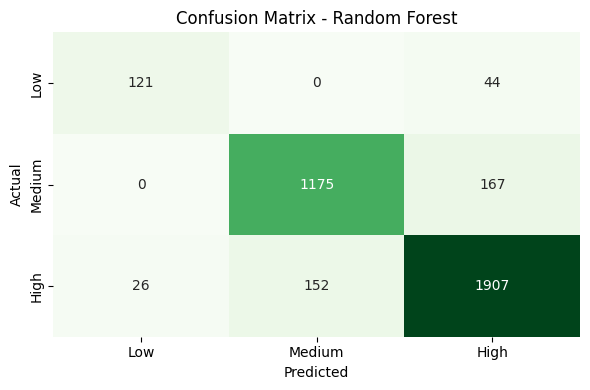

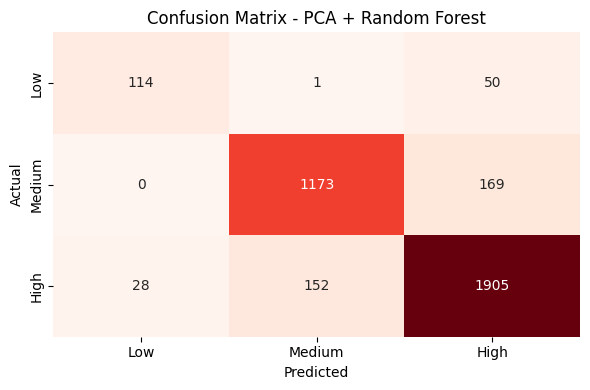

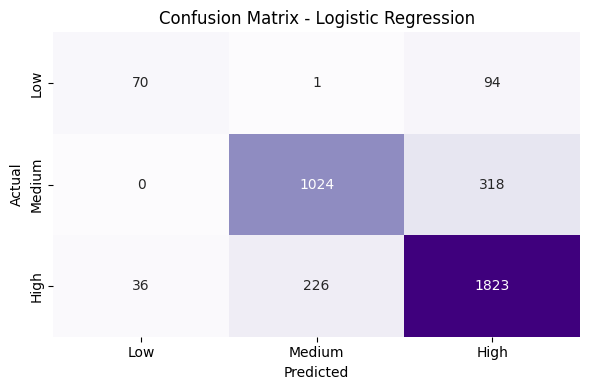

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix

def plot_confusion_matrix(y_true, y_pred, model_name,color):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, cbar=False,
                xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree','Blues')
plot_confusion_matrix(y_test, rf_pred, 'Random Forest','Greens')
plot_confusion_matrix(y_test, pca_rf_pred, 'PCA + Random Forest','Reds')
plot_confusion_matrix(y_test, log_pred, 'Logistic Regression','Purples')
